I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman. 
**Dataset**: The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.
**Description of Variables**: The dataset contains 6366 observations of 9 variables:
rate_marriage: woman's rating of her marriage (1 = very poor, 5 =very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 =some college, 16 = college graduate, 17 = some graduate school, 20= advanced degree)
occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 =teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs

In [20]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices,dmatrix
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score,precision_score,recall_score,precision_recall_curve,f1_score,roc_auc_score,roc_curve,confusion_matrix

In [21]:
# Importing the data

dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [22]:
# add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs>0).astype(int)
dta=dta.drop(['affairs'],axis=1)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [23]:
# Checking for null values
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affair             0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

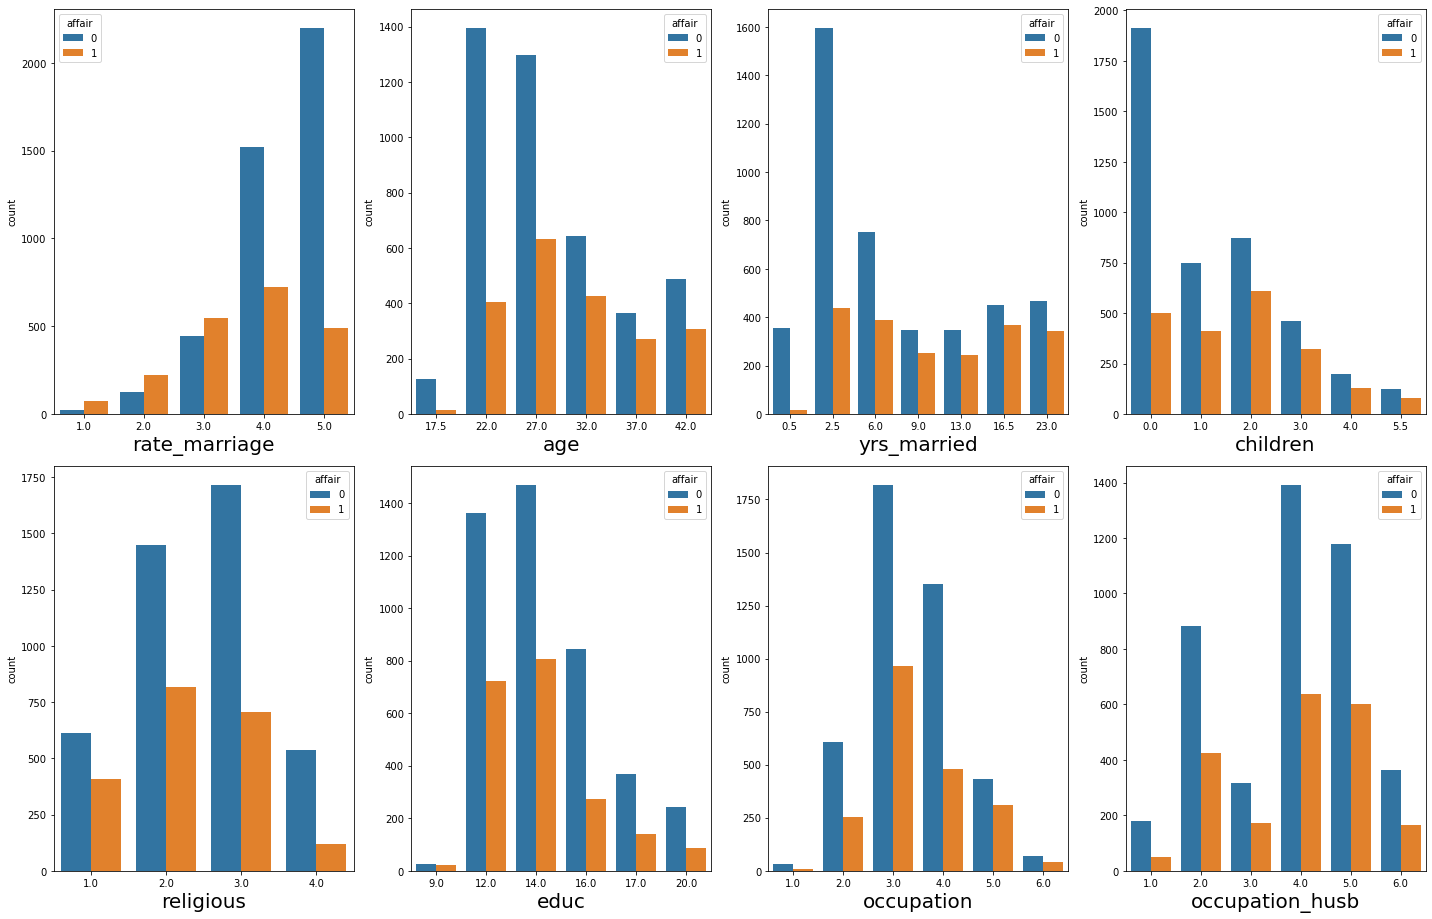

In [24]:
# Visualization of the various parameters

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta.columns:
    if column!='affair'and plotnumber<=9:
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(column,data=dta,hue='affair')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [25]:
# Seperating the dependent and independent variables
y, X = dmatrices('affair ~ rate_marriage+age+yrs_married+children+religious+educ+C(occupation)+C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [26]:
#Splitting into test and train data

x_train,x_test,y_train,y_test = train_test_split(X,np.ravel(y),test_size = 0.2,random_state=355)

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(x_train,y_train)
log_reg.score(x_train,y_train)

Let's see how well our model performs on the test data set.

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test,log_reg.predict(x_test))
accuracy

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,log_reg.predict(x_test))
conf_mat

In [ ]:
# Precision Score
precision = precision_score(y_test,log_reg.predict(x_test))
precision

In [ ]:
# Recall
recall=recall_score(y_test,log_reg.predict(x_test))
recall

In [ ]:
# F1 Score
F1_Score=f1_score(y_test,log_reg.predict(x_test))
F1_Score